In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from string import punctuation
from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score,precision_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif
import sklearn.model_selection as selection


from sklearn import svm
from sklearn.utils import shuffle

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
test_df = pd.read_csv("test.csv")
train_df= pd.read_csv("train.csv")

In [3]:
test_df.head(5)

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                     

In [5]:
train_df.head(5)

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                      Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                      ----- 
 0   2                                                                  

In [7]:
test_pos = test_df['2'][test_df['2'] == 2]

In [8]:
test_pos.describe()

count    199999.0
mean          2.0
std           0.0
min           2.0
25%           2.0
50%           2.0
75%           2.0
max           2.0
Name: 2, dtype: float64

In [9]:
test_neg = test_df['2'][test_df['2']==1]

In [10]:
test_neg.describe()

count    200000.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: 2, dtype: float64

In [11]:
train_pos = train_df['2'][train_df['2']==2]

In [12]:
train_pos.describe()

count    1799999.0
mean           2.0
std            0.0
min            2.0
25%            2.0
50%            2.0
75%            2.0
max            2.0
Name: 2, dtype: float64

In [13]:
train_neg = train_df['2'][train_df['2']==1]

In [14]:
train_neg.describe()

count    1800000.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: 2, dtype: float64

In [15]:
train_df.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [16]:
test_df.head()

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [17]:
row = train_df.columns
row

Index(['2', 'Stuning even for the non-gamer',
       'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'],
      dtype='object')

In [18]:
arr = []

In [19]:
arr.append(int(row[0]))
arr.append(row[1])
arr.append(row[2])

In [20]:
train_df.columns = ['Sentiment','Review_Title','Review']

In [21]:
train_df.head()

,Sentiment,Review_Title,Review
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Sentiment     int64 
 1   Review_Title  object
 2   Review        object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [23]:
row

Index(['2', 'Stuning even for the non-gamer',
       'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'],
      dtype='object')

In [24]:
df1 = pd.DataFrame(np.insert(train_df.values, 0, values=[arr[0], arr[1], arr[2]], axis=0))

In [25]:
df1.columns = train_df.columns

In [26]:
train_df = df1

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Sentiment     object
 1   Review_Title  object
 2   Review        object
dtypes: object(3)
memory usage: 82.4+ MB


The columns for the test dataframe will now be changed.

In [28]:
row = test_df.columns

In [29]:
arr.append(int(row[0]))
arr.append(row[1])
arr.append(row[2])

In [30]:
test_df.columns = train_df.columns

In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Sentiment     399999 non-null  int64 
 1   Review_Title  399989 non-null  object
 2   Review        399999 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [33]:
df1 = pd.DataFrame(np.insert(test_df.values, 0, values=[arr[0], arr[1], arr[2]], axis=0))

In [34]:
df1.columns = test_df.columns

In [35]:
test_df = df1

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Sentiment     400000 non-null  object
 1   Review_Title  399990 non-null  object
 2   Review        400000 non-null  object
dtypes: object(3)
memory usage: 9.2+ MB


In [37]:
train_df.describe()

,Sentiment,Review_Title,Review
count,3600000,3599923,3600000
unique,2,2628753,3594783
top,2,Disappointed,"I bought a QPS back in April, I had configurat..."
freq,1800000,9623,15


In [38]:
train_df.isna().any()

Sentiment       False
Review_Title     True
Review          False
dtype: bool

In [39]:
train_df['Review_Title'][train_df['Review_Title'].isna()]

26554      NaN
26827      NaN
36598      NaN
132358     NaN
134465     NaN
          ... 
3292195    NaN
3293615    NaN
3403351    NaN
3493132    NaN
3575894    NaN
Name: Review_Title, Length: 77, dtype: object

In [40]:
train_df['Review_Title'] = train_df['Review_Title'].replace(np.NaN,'Missing Title')

In [41]:
train_df['Review_Title'].isna().any()

False

In [42]:
test_df.isna().any()

Sentiment       False
Review_Title     True
Review          False
dtype: bool

In [43]:
test_df['Review_Title'] = test_df['Review_Title'].replace(np.NaN,'Missing Title')

In [44]:
test_df.isna().any()

Sentiment       False
Review_Title    False
Review          False
dtype: bool

### Preprocessing

In [45]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [74]:
review = train_df['Review'][0:10000]

In [75]:
review[0:10]

0    This sound track was beautiful! It paints the ...
1    I'm reading a lot of reviews saying that this ...
2    This soundtrack is my favorite music of all ti...
3    I truly like this soundtrack and I enjoy video...
4    If you've played the game, you know how divine...
5    I am quite sure any of you actually taking the...
6    This is a self-published book, and if you want...
7    I loved Whisper of the wicked saints. The stor...
8    I just finished reading Whisper of the Wicked ...
9    This was a easy to read book that made me want...
Name: Review, dtype: object

In [76]:
#function to clean review text
def review_clean_text(reviewData):
    cleanText = reviewData.lower()
    stopList = stopwords.words('english')
    stop = [w for w in cleanText.split() if w not in (stopList) and w not in ENGLISH_STOP_WORDS]
    cleanText = " ".join(stop)
    cleanText = re.sub(r"((?::|;|=|\^|\*)(?:-|\_)?(?:\)|D|\^|\*))", "happyemote", cleanText) # identifying happy emotes
    cleanText = re.sub(r"((?::|;|=|-)(?:-|\_)?(?:\(|C|-))","sademote", cleanText) # identifying sad emotes
    cleanText = re.sub(r"[^\w\s]", " ", cleanText) #to remove all punctuation marks
    cleanText = re.sub(r"\d+", "", cleanText)#To remove the numbers
    cleanText = re.sub(r"\b[a-z]\b","",cleanText) # to remove seperated letters
    cleanText = cleanText.split() # Tokenize the reviews
    return cleanText

In [77]:
review = review.apply(review_clean_text)

In [78]:
review[0:10]

0    [sound, track, beautiful, paints, senery, mind...
1    [reading, lot, reviews, saying, best, game, so...
2    [soundtrack, favorite, music, time, hands, dow...
3    [truly, like, soundtrack, enjoy, video, game, ...
4    [played, game, know, divine, music, is, single...
5    [quite, sure, actually, taking, time, read, pl...
6    [self, published, book, want, know, whysademot...
7    [loved, whisper, wicked, saints, story, amazin...
8    [finished, reading, whisper, wicked, saints, f...
9    [easy, read, book, want, reading, on, easy, do...
Name: Review, dtype: object

### Model

In [83]:
def text_fit(X, y, model, clf_model, select_percentile_value, coef_show=1):
    X_c = model.fit_transform(X)
    print('# features before applying select percentile: {}'.format(X_c.shape[1]))
    select_percentile = SelectPercentile(f_classif, select_percentile_value)
    X_transformed = select_percentile.fit_transform(X_c, y)
    print('# features after applying select percentile: {}'.format(X_transformed.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    print ('Model Accuracy: {}'.format(accuracy))
    if coef_show == 1:
        idx = np.arange(0, X_c.shape[1])  #create an index array
        features_to_keep = idx[select_percentile.get_support() == True]
        cols = np.array(list(model.vocabulary_.keys()))
        w = cols[features_to_keep]
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    return precision

In [81]:
X = review.astype(str)
y = train_df['Sentiment'][0:10000].astype(int)

In [85]:
SupportVectorMachine = svm.SVC()
tfidf = TfidfVectorizer(stop_words = 'english')

In [92]:
precision = text_fit(X,y,tfidf,SupportVectorMachine, 100, 0)

# features before applying select percentile: 29882
# features after applying select percentile: 29882
# train records: 7500
# test records: 2500


C:\Users\saiee\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass percentile=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Model Accuracy: 0.8376


### Using the Model to make predictions

In [93]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2), stop_words = 'english')

In [94]:
X_c = tfidf_n.fit_transform(X)

In [95]:
X_train, X_test, y_train, y_test = selection.train_test_split(X_c, y, test_size=0.2, shuffle=True)

In [103]:
SVM = svm.SVC().fit(X_train, y_train)

In [104]:
pred = SVM.predict(X_test)

In [125]:
df_pred = pd.DataFrame()

In [126]:
df_pred['Sentiment'] = pred

### Count plot of  predictions made by the model

<AxesSubplot:title={'center':'Model Predictions'}, xlabel='Sentiment', ylabel='Count'>

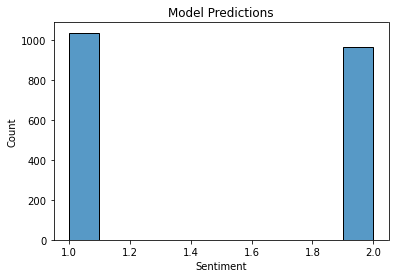

In [127]:
plt.title('Model Predictions')
sns.histplot(data=df_pred, x="Sentiment", bins=10)

### Count plot of orignal data

<AxesSubplot:title={'center':'Orignal Data'}, xlabel='Sentiment', ylabel='Count'>

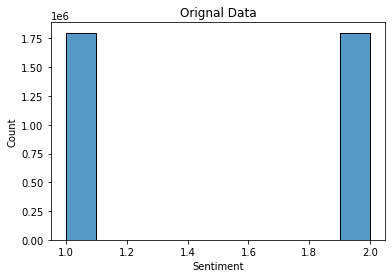

In [128]:
plt.title('Orignal Data')
sns.histplot(data=train_df, x="Sentiment", bins=10)

## Using the model for random input

In [98]:
text = 'I love this product'

In [101]:
cleanT = review_clean_text(text)

In [102]:
cleanT

['love', 'product']

In [110]:
tC = tfidf_n.fit_transform(cleanT)

In [111]:
SVM.predict(tC)

ValueError: X.shape[1] = 2 should be equal to 281762, the number of features at training time